In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

### Working through an example from <[Lecture 10 Bayesian Inference]> ###

[Lecture 10 Bayesian Inference]: https://www.youtube.com/watch?v=mDVE0M-xQlc&list=PLruBu5BI5n4aFpG32iMbdWoRVAA-Vcso6&index=1

This notebook is based on the 10th lecture for Sir David Mackay's course on Information Theory and Bayesian Inference.

We will be working through an example of fitting an exponential distribution using Bayesian Inference 
to a series of data points that are supposed to represent particles emitted from some source. We'd like to infer
Lambda given the data e.g. $${{P(\lambda | x_i, H)}} $$

To do this we use Bayes theorem to set up the RHS of the equation:

$$
\frac{\prod_{i=1}^{N} \left( \frac{1}{Z(\alpha_i, \beta_i)} e^{-\frac{x_i}{\lambda}} \right) \times P(\lambda | H)}{P(x_i | H)}
$$


The first term in the numerator represents our __'likelihood function__' which is $${{P(x | \lambda)}}$$ while the second is our __prior__. This is all divided by our 
normalizing constant. Based on the data, we try to infer lambda which
is the only parameter we need for our exponential function

Here Z is the normalizing constant which is just integrating out x based on our bounds for a given value of lambda. 
$$
Z = \int_{a}^{b} e^{-x/\lambda} \, dx = \frac{1}{\lambda} \left[ e^{-a/\lambda} - e^{-b/\lambda} \right]
$$

Lastly, for this exercise we will use H that x is exponential distributed and 
prob of log lambda is uniformly distributed over 0.1 to 50

Let's implement this in Python!

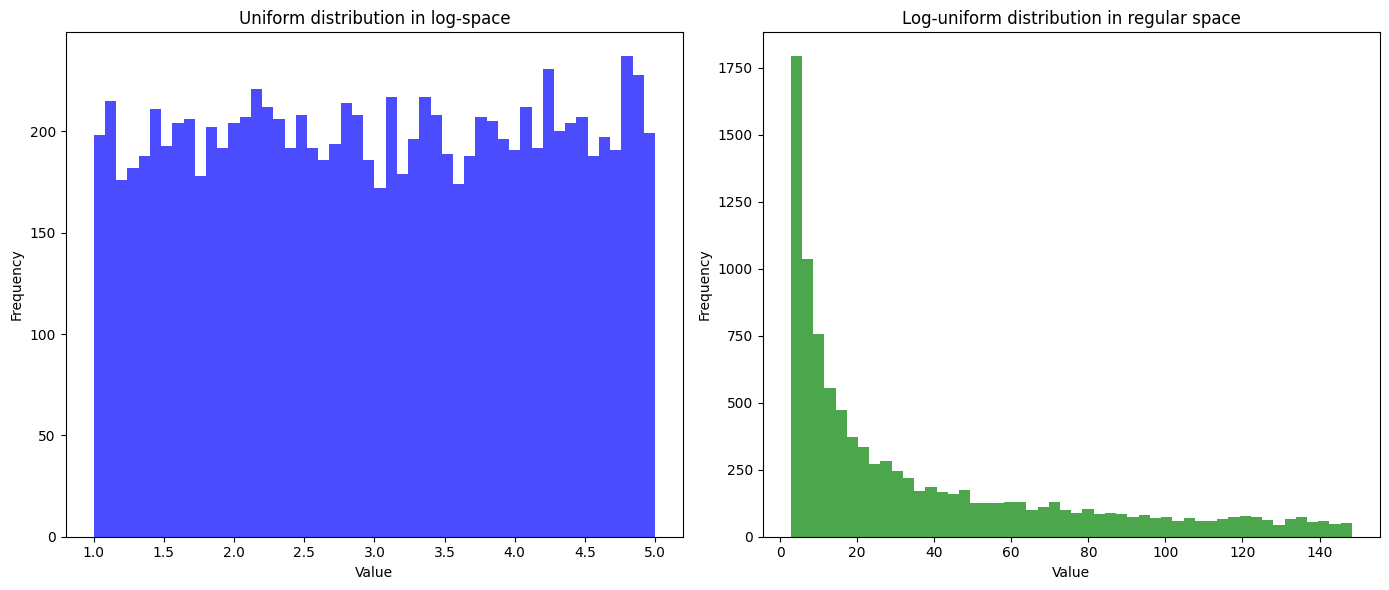

In [19]:
# showing what our log uniform prior might look like 
log_uniform_samples = np.random.uniform(low=1, high=5, size=10000)
regular_space_samples = np.exp(log_uniform_samples)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(log_uniform_samples, bins=50, color='blue', alpha=0.7)
plt.title('Uniform distribution in log-space')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(regular_space_samples, bins=50, color='green', alpha=0.7)
plt.title('Log-uniform distribution in regular space')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Naive Implementation for Visualization ###

In [30]:
def Z(a, b, lambda_):
    return (np.exp(-(a / lambda_)) - np.exp(-(b / lambda_))) * lambda_

def likelihood_func(lambda_, a, b, x):
    likelihoods = np.exp(-x / lambda_)/(Z(a, b, lambda_))
    return np.prod(likelihoods)

def get_likelihoods(lambdas, a, b, x):
    return [likelihood_func(lambda_, a, b, x) for lambda_ in lambdas]


Numerator = 0.513417119032592
Normalizing constant = 2.1457760303173483
Prob x given lambda = 0.23926873624208603


Quick plot of the expon pdf for a particular lambda

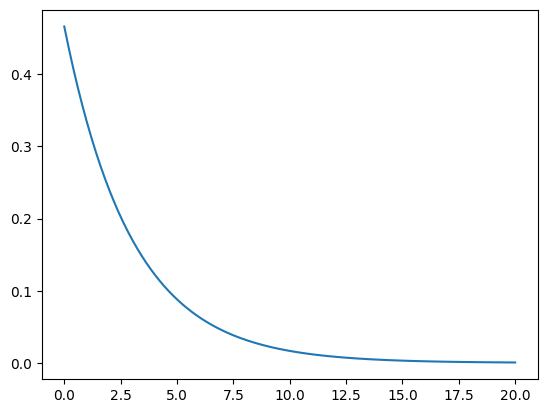

In [57]:
# using x and lambda above, lets view the pdf for one lambda and one x 
lambda_ = 3
x = 2
a = 1
b = 20

x = np.linspace(0, 20, 100) 
y = np.exp(-x / lambda_)/(Z(a, b, lambda_))

plt.plot(x, y)
plt.show()

Now we can fix x, and then view $${{P(x = 3| \lambda)}}$$ for a range of lambdas

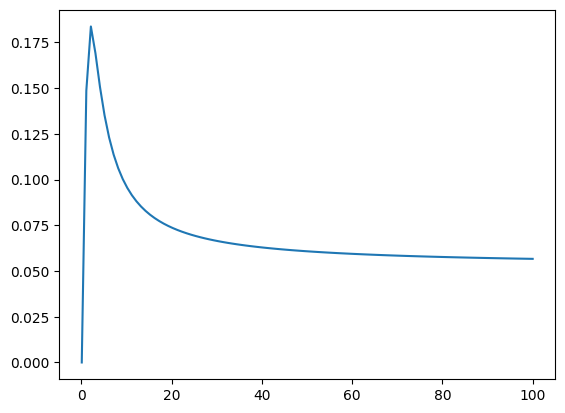

In [58]:

x = 3
lambdas =  np.linspace(0.1, 100, 100)
y = np.exp(-x / lambdas)/(Z(a, b, lambdas))
plt.plot(lambdas, y)
plt.show()


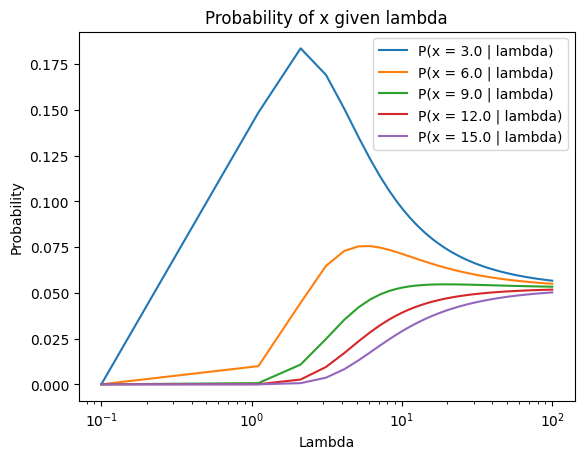

In [63]:
# lets do it now for multiple x's and view on same plot 
x_range = np.linspace(3, 15, 5)
lambdas =  np.linspace(0.1, 100, 100)
for x in x_range:
    y = np.exp(-x/lambdas)/(Z(a, b, lambdas))
    plt.plot(lambdas, y, label=f"P(x = {x} | lambda)")

plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Probability')
plt.title('Probability of x given lambda')
plt.legend()

## What do you notice? ## 

All of these show that for a particular data point, there is
a particular value of lambda that makes it most probable! 

What bayesian inference does is take all the data points you have, calculate these
probabilities, and then multiply them together. If we are adjust our calculation
above slightly, you can see the resulting distribution as a function of lambda. 

(100,)


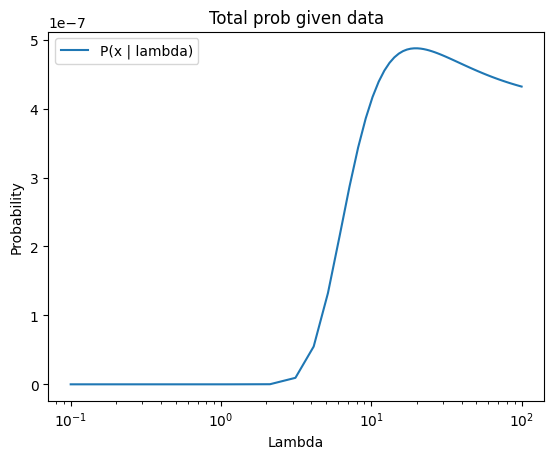

In [62]:
# lets do it now for multiple x's and view on same plot 
distributions = []
x_range = np.linspace(3, 15, 5)
lambdas =  np.linspace(0.1, 100, 100)
for x in x_range:
    y = np.exp(-x/lambdas)/(Z(a, b, lambdas))
    distributions.append(y)

total_prob = np.prod(distributions, axis=0)
print(total_prob.shape)

plt.plot(lambdas, total_prob, label=f"P(x | lambda)")
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Probability')
plt.title('Total prob given data')
plt.legend()
plt.show()

Voila! we have a peak around lambda = 10. For this type of work I find it 
very helpful that we decided to view everything in parameter space, as it 
shows the crux of what bayesian inference is doing, infering over your parameters given data! 